In [1]:
import zillow_wrangle
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import scipy.stats as stats

<h3>Exercises:</h3>

__Sourcing the Zillow database as the data source, create a jupyter notebook named explore_zillow and do the following:__

Ask at least 5 questions about the data, keeping in mind that your target variable is logerror. e.g. Is logerror significantly different for properties in LA County vs Orange County vs Ventura County?

__Answer those questions through a mix of statistical tests and visualizations.__

<h4>Bonus:</h4>

Compute the mean(logerror) by zipcode and the overall mean(logerror). Write a loop that will run a t-test between the overall mean and the mean for each zip code. We want to identify the zip codes where the error is significantly higher or lower than the expected error.

Questions:

- univariate: What are the distribution of each variable?

- bivariate: Is there a relationship between lot size and logerror?

- bivariate: Is there a relationship between home size and logerror?

- bivariate: Does the logerror score vary by county(fips)?

- multivariate: If we control year built, does the logerror differ by county(fips)?






In [2]:
# acquire zillow data
df = zillow_wrangle.get_zillow_data()
df.head()

,id,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,...,censustractandblock,logerror,transactiondate,airconditioningdesc,architecturalstyledesc,buildingclassdesc,heatingorsystemdesc,propertylandusedesc,storydesc,typeconstructiondesc
0,1727539,14297519,NaN,NaN,NaN,3.5,4.0,NaN,NaN,3.5,...,6.059063e+13,0.025595,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN
1,1387261,17052889,NaN,NaN,NaN,1.0,2.0,NaN,NaN,1.0,...,6.111001e+13,0.055619,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN
2,11677,14186244,NaN,NaN,NaN,2.0,3.0,NaN,NaN,2.0,...,6.059022e+13,0.005383,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN
3,2288172,12177905,NaN,NaN,NaN,3.0,4.0,NaN,8.0,3.0,...,6.037300e+13,-0.103410,2017-01-01,NaN,NaN,NaN,Central,Single Family Residential,NaN,NaN
4,1970746,10887214,1.0,NaN,NaN,3.0,3.0,NaN,8.0,3.0,...,6.037124e+13,0.006940,2017-01-01,Central,NaN,NaN,Central,Condominium,NaN,NaN


In [3]:
# prepare data
df = zillow_wrangle.prepare_zillow(df)
df.head()

,id,parcelid,bathroomcnt,bedroomcnt,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,latitude,...,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,logerror,transactiondate,propertylandusedesc,county
0,1727539,14297519,3.5,4.0,3.5,3100.0,3100.0,6059.0,3.0,33634931.0,...,485713.0,1023282.0,2016.0,537569.0,11013.72,6.059063e+13,0.025595,2017-01-01,Single Family Residential,Orange
1,1387261,17052889,1.0,2.0,1.0,1465.0,1465.0,6111.0,1.0,34449266.0,...,88000.0,464000.0,2016.0,376000.0,5672.48,6.111001e+13,0.055619,2017-01-01,Single Family Residential,Ventura
2,11677,14186244,2.0,3.0,2.0,1243.0,1243.0,6059.0,2.0,33886168.0,...,85289.0,564778.0,2016.0,479489.0,6488.30,6.059022e+13,0.005383,2017-01-01,Single Family Residential,Orange
3,2288172,12177905,3.0,4.0,3.0,2376.0,2376.0,6037.0,3.0,34245180.0,...,108918.0,145143.0,2016.0,36225.0,1777.51,6.037300e+13,-0.103410,2017-01-01,Single Family Residential,Los Angeles
6,781532,12095076,3.0,4.0,3.0,2962.0,2962.0,6037.0,3.0,34145202.0,...,276684.0,773303.0,2016.0,496619.0,9516.26,6.037461e+13,-0.001011,2017-01-01,Single Family Residential,Los Angeles


In [4]:
# view column names
df.columns.tolist()

['id',
 'parcelid',
 'bathroomcnt',
 'bedroomcnt',
 'calculatedbathnbr',
 'calculatedfinishedsquarefeet',
 'finishedsquarefeet12',
 'fips',
 'fullbathcnt',
 'latitude',
 'longitude',
 'lotsizesquarefeet',
 'propertycountylandusecode',
 'propertylandusetypeid',
 'rawcensustractandblock',
 'regionidcity',
 'regionidcounty',
 'regionidzip',
 'roomcnt',
 'yearbuilt',
 'structuretaxvaluedollarcnt',
 'taxvaluedollarcnt',
 'assessmentyear',
 'landtaxvaluedollarcnt',
 'taxamount',
 'censustractandblock',
 'logerror',
 'transactiondate',
 'propertylandusedesc',
 'county']

In [5]:
# split the data by calling split function
train, validate, test, X_train, y_train, X_validate, y_validate, X_test, y_test = zillow_wrangle.split_zillow(df, 'logerror')

1. Univariate: What are the distribution of each variable?

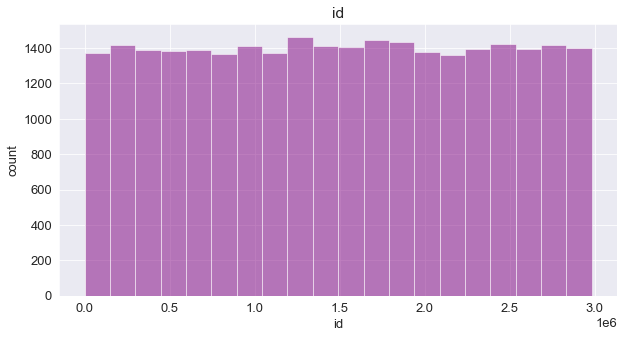

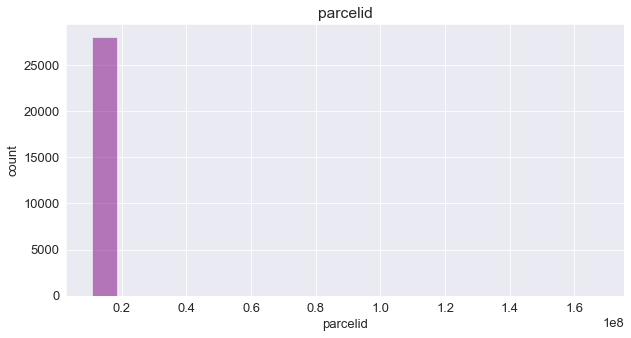

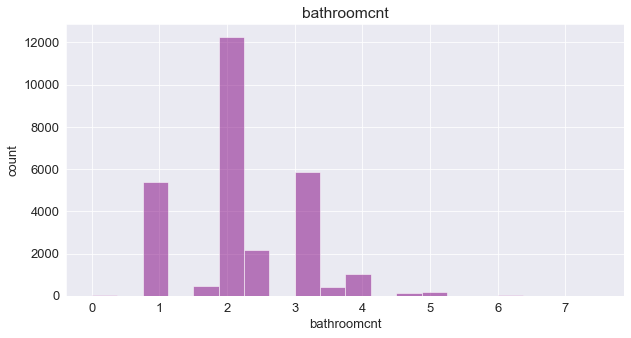

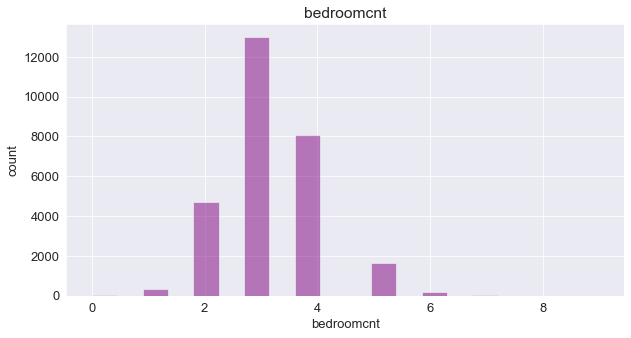

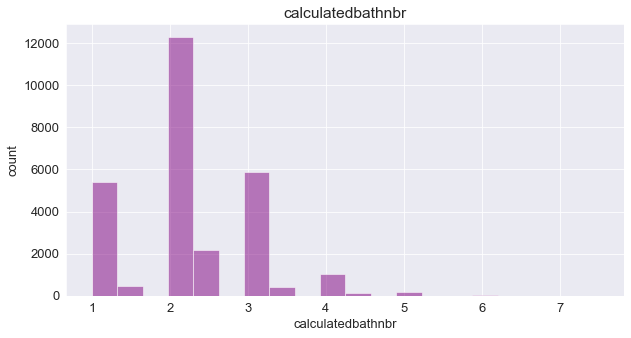

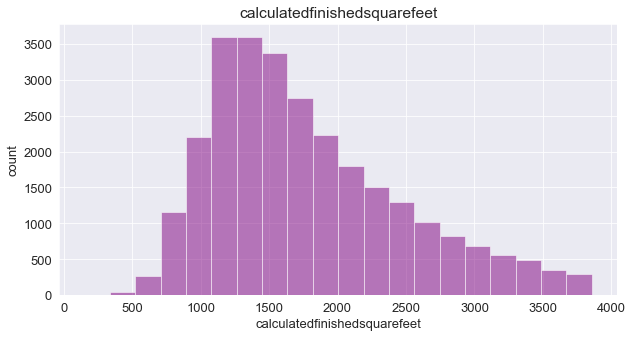

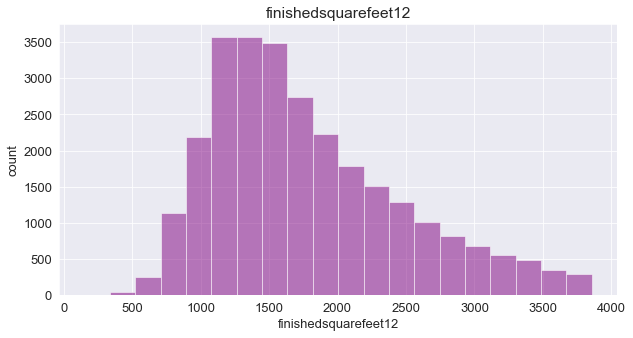

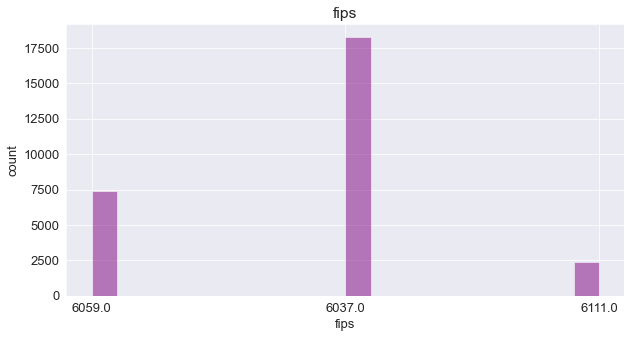

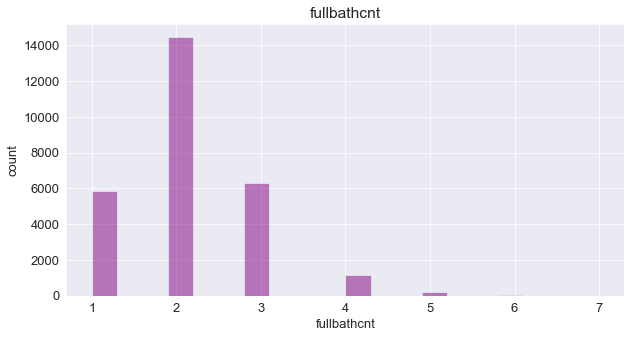

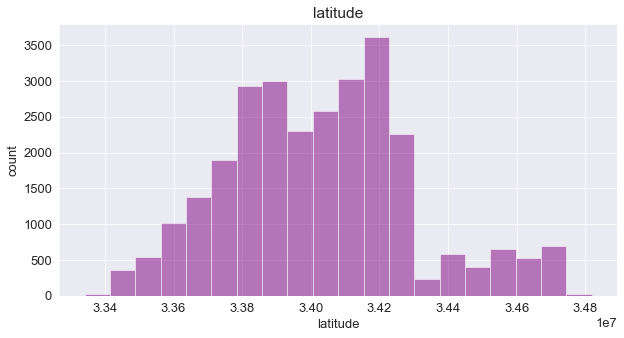

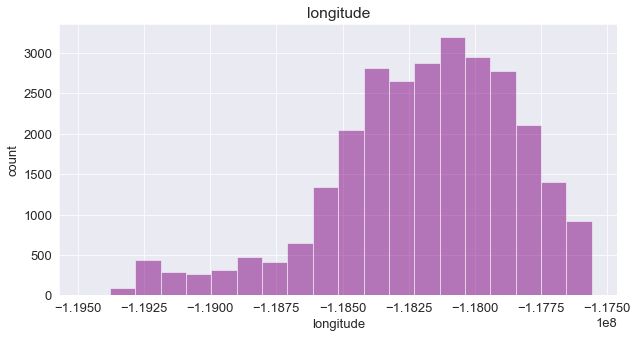

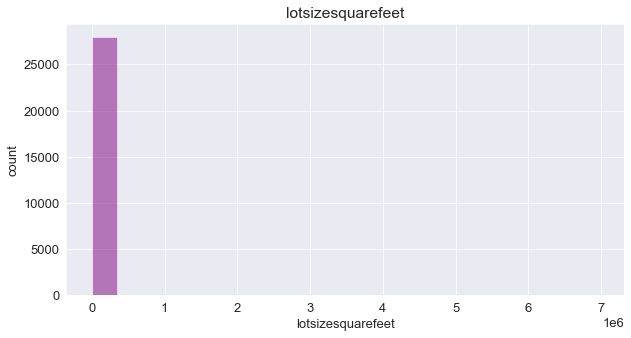

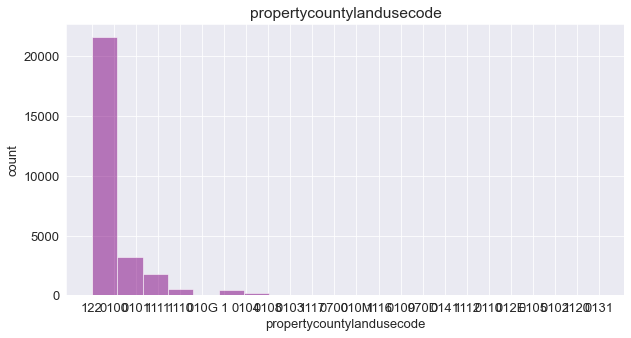

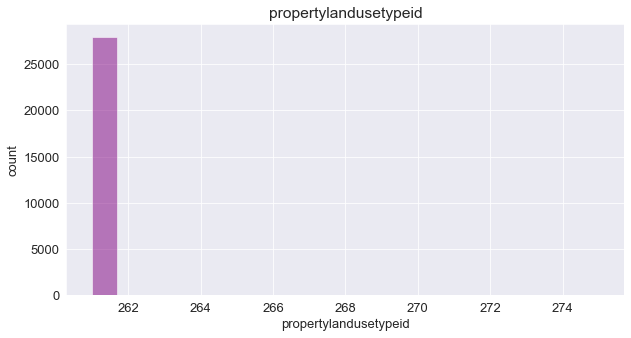

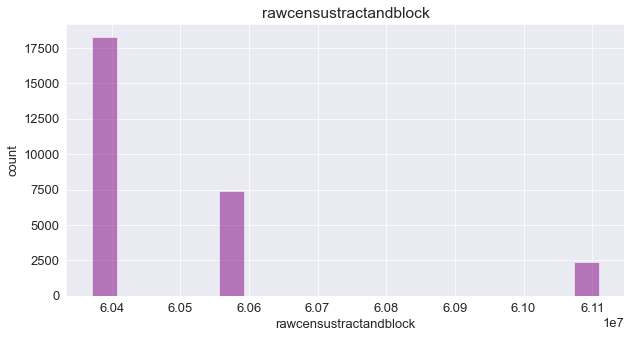

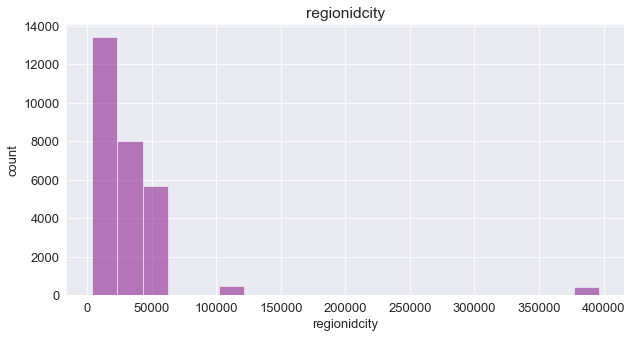

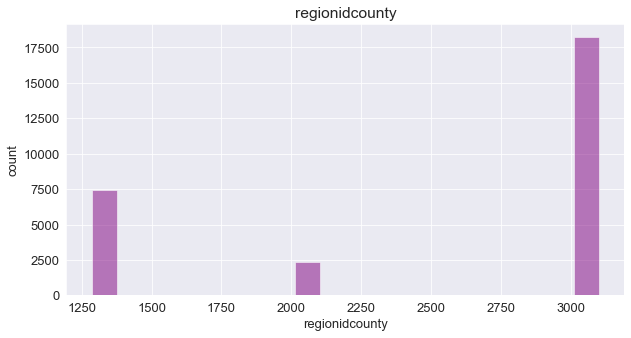

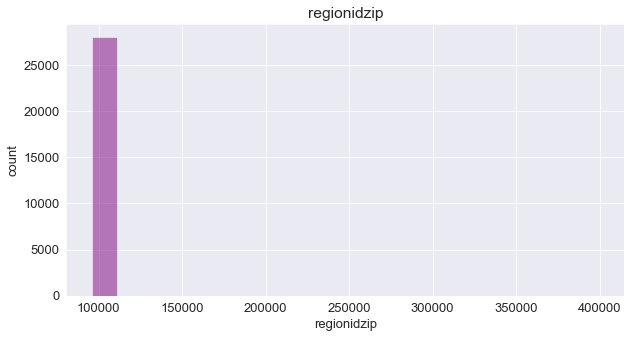

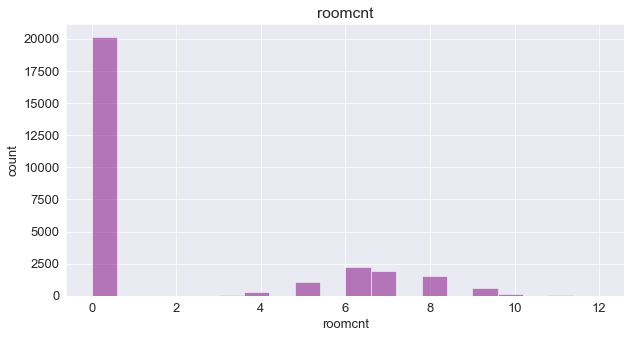

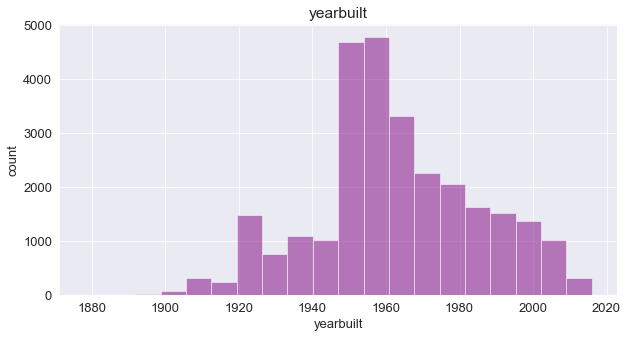

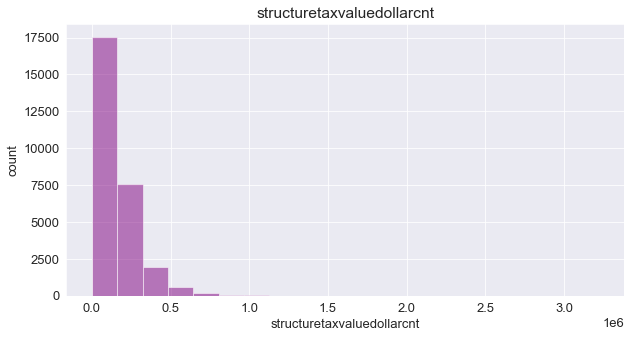

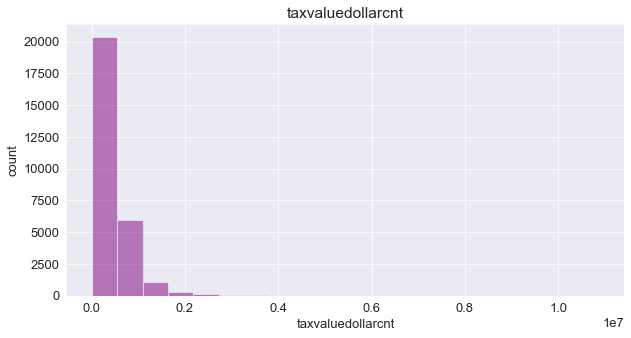

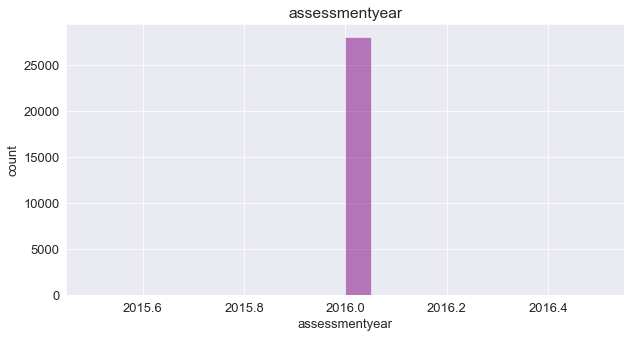

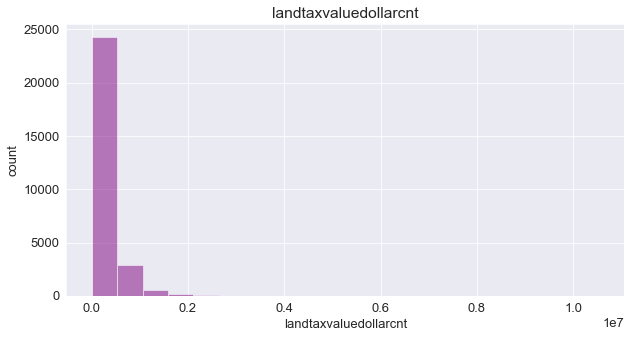

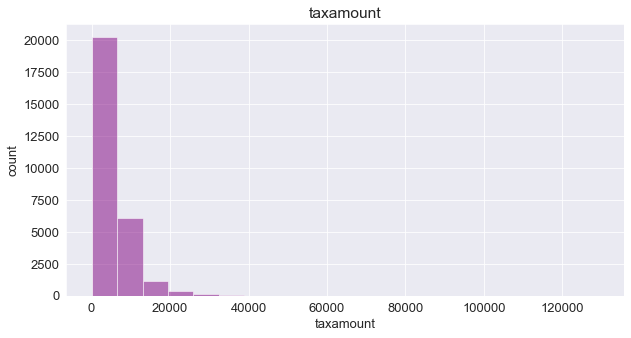

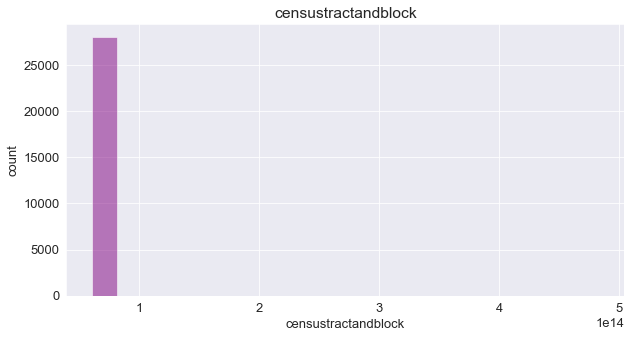

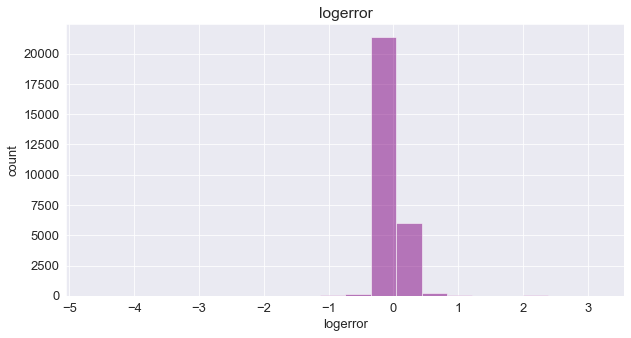

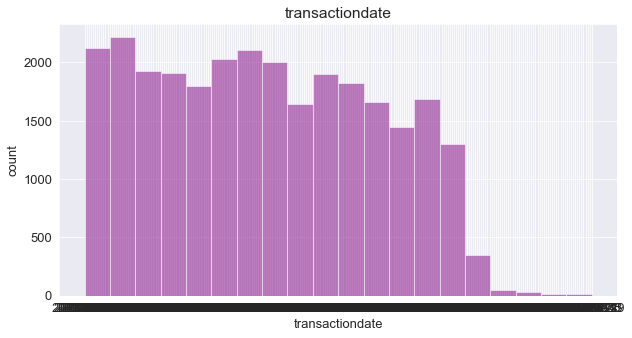

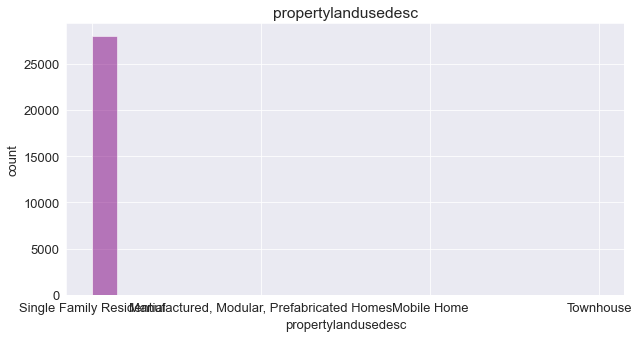

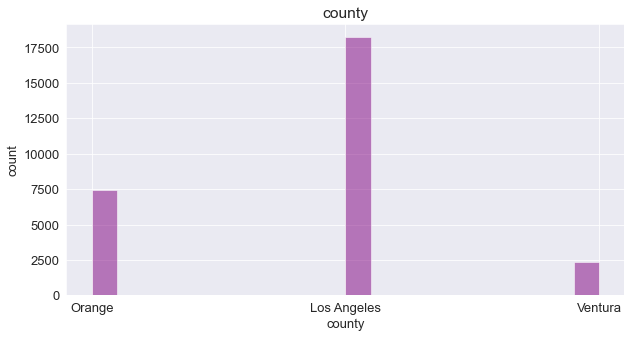

In [6]:
for col in train.columns:
    plt.figure(figsize=(10,5))
    # dark style
    sns.set_style("darkgrid")
    plt.hist(train[col], bins=20, alpha=0.5, label='train', color='purple')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('count')
    plt.show()
    

Key Takeaways:

- The majority of the features seem to not have a normal distribution except for longitude and calculated_finished_square_feet.

2. Bivariate: 

- Is there a relationship between calculatedfinishedsquarefeet and logerror?
    - calculatedfinishedsquarefeet(continuous) vs logerror(continuous)
    - pearson correlation

- Is there a relationship between home size and logerror?
    - homesize(continuous) vs logerror(continuous)
    - pearson correlation

- Does the logerror score vary by county(fips)?
    - logerror(continuous) vs fips(categorical)
    - two sample, two tail t-test


Is there a relationship between calculatedfinishedsquarefeet and logerror?

- calculatedfinishedsquarefeet(continuous) vs logerror(continuous)
- pearson correlation

In [7]:
# utilize pearsonr function to find the correlation between the variables
corr, p_value = stats.pearsonr(train['logerror'], train['calculatedfinishedsquarefeet'])
print(corr, p_value)

0.01973057947503594 0.0009530555287500763


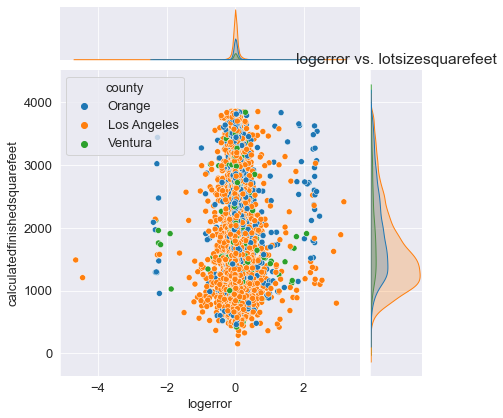

In [14]:
# visualize the correlation between the variables
sns.set_style("darkgrid")
sns.jointplot(x='logerror', y='calculatedfinishedsquarefeet', data=train, hue='county')
plt.title('logerror vs. lotsizesquarefeet')
plt.xlabel('logerror')
plt.ylabel('calculatedfinishedsquarefeet')
plt.show()

Hypothesis Testing:

H0: There is no relationship between lot size and logerror

Ha: There is a relationship between lot size and logerror

In [9]:
# set alpha to 0.05 for hypothesis testing
alpha = 0.05

if p_value < alpha:
    print('Reject the null hypothesis')
else:
    print('Fail to reject the null hypothesis')

Reject the null hypothesis


Key Takeaways:
- calculatedfinishedsquarefeet is correlated with logerror

Is there a relationship between longitude and logerror?

  - longitude(continuous) vs logerror(continuous)
  - pearson correlation

In [10]:
# utilize pearsonr function to find the correlation between the variables
corr, p_value = stats.pearsonr(train['logerror'], train['longitude'])
print(corr, p_value)

0.02557860154202288 1.8388653521262677e-05


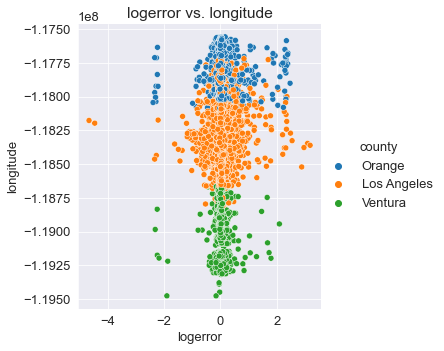

In [15]:
# visualize the correlation between the variables
sns.set_style("darkgrid")
sns.relplot(x='logerror', y='longitude', data=train, hue='county')
plt.title('logerror vs. longitude')
plt.xlabel('logerror')
plt.ylabel('longitude')
plt.show()

Hypothesis Testing:

H0: There is no relationship between longitude and logerror

Ha: There is a relationship between longitude and logerror

In [12]:
# set alpha to 0.05 for hypothesis testing
alpha = 0.05

if p_value < alpha:
    print('Reject the null hypothesis')
else:
    print('Fail to reject the null hypothesis')

Reject the null hypothesis


Key Takeaways:
- longitude is correlated with logerror

Does the logerror score vary by county(fips)?

logerror(continuous) vs fips(categorical)

two sample, two tail t-test

In [13]:
# test the assumption of equal variance
stats.levene(train[train.fips <= 6037].logerror, train[train.fips > 6037].logerror)

TypeError: '<=' not supported between instances of 'str' and 'int'

In [ ]:
# mannwhitneyu test (alternative to levene)
t, p = stats.mannwhitneyu(train[train.fips <= 6037].logerror, train[train.fips > 6037].logerror)
print(t, p)


Hypothesis Testing:

H0: There is no difference between the means of logerror and fips

Ha: There is a difference between the means of logerror and fips

In [ ]:
# set alpha to 0.05 for hypothesis testing
alpha = 0.05

if p < alpha:
    print('Reject the null hypothesis')
else:
    print('Fail to reject the null hypothesis')

In [ ]:
# visualize the distribution of the variables
sns.set_style("darkgrid")
sns.boxenplot(x='fips', y='logerror', data=train)
plt.title('logerror vs. fips')
plt.xlabel('fips')
plt.ylabel('logerror')
plt.show()

Key Takeaways:

There is a difference between the means of logerror and fips. This is because the logerror is significantly higher in LA County and Orange County. This is because the logerror is higher in LA County due to the property being located in a more developed area.

5. Multivariate: If we control year built, does the logerror differ by county(fips)?

In [ ]:
# describe the yearbuilt
train['yearbuilt'].describe()

In [ ]:
# cut the yearbuilt into quartiles
train['yearbuilt_bin'] = pd.cut(train['yearbuilt'], bins=[0, 1960, 1980, 2000, 2020], labels=['0-1960', '1960-1980', '1980-2000', '2000-2020'])

In [ ]:
# check the data
train.head()

In [ ]:
train.yearbuilt_bin.value_counts()

In [ ]:
# visualize the distribution of the variables
sns.set_style("darkgrid")
sns.barplot(x='yearbuilt_bin', y='logerror', data=train, hue='fips')
plt.title('logerror vs. yearbuilt_bin')
plt.xlabel('yearbuilt_bin')
plt.ylabel('logerror')
plt.show()
